<a href="https://colab.research.google.com/github/ArnavJalan-30/digital_image_processing/blob/main/image_enhancement_2210110192.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[20MARKS]

# Prerequisite
* Load required packages and load images (already uploaded on  blackboard content) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY tensorflow operations and basic numpy operations are allowed**


In [45]:
import tensorflow as tf
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np

# Q1) Display following stages
## a) Load 'skeleton_orig.tif'        


In [46]:
# Read image using TensorFlow
img_path = '/content/skeleton_orig.tif'
# img = tf.io.read_file(img_path)
img = imageio.imread(img_path)
img = tf.convert_to_tensor(img, dtype=tf.float32)
# img = tf.image.decode_image(img, channels=1)  # Grayscale image

In [47]:
# Define kernel
kernel_sz1 = tf.ones((1, 1), dtype=tf.float32)

In [48]:
# Change data type of image using TensorFlow
img_a = tf.cast(img, tf.float32)  # Convert image to float32
img_a = tf.nn.conv2d( tf.reshape(img_a, (1,img_a.shape[0],img_a.shape[1],1)),\
                     tf.reshape(kernel_sz1,\
                      (kernel_sz1.shape[0],kernel_sz1.shape[1],1,1)),\
                      strides=[1, 1, 1, 1], padding='SAME')

In [49]:
# Print information about the image
print('Original Data_type is', img.dtype)
print('Kernel_sz1 =', kernel_sz1)
print('Data_type is', img_a.dtype)
print('Image Size is', img_a.shape)
print('Image min and max are ({}, {})'.format(tf.reduce_min(img_a),\
                                              tf.reduce_max(img_a)))

Original Data_type is <dtype: 'float32'>
Kernel_sz1 = tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
Data_type is <dtype: 'float32'>
Image Size is (1, 800, 500, 1)
Image min and max are (0.0, 255.0)


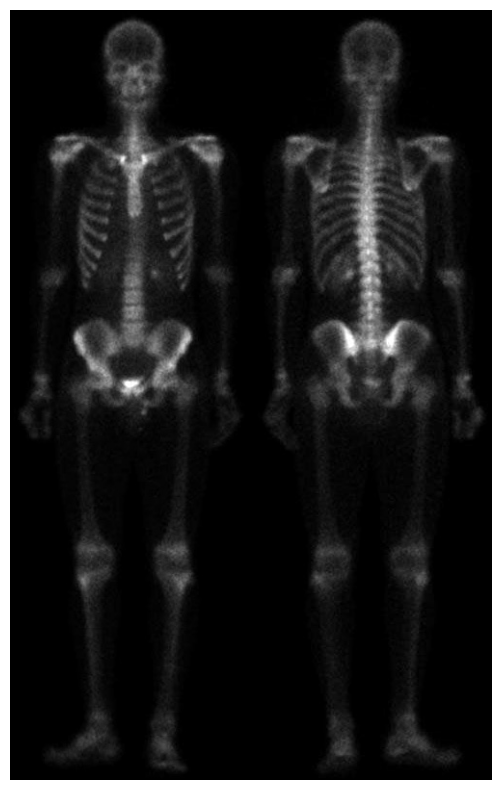

In [50]:
plt.figure(figsize=(10,10))
plt.imshow(tf.squeeze(img_a), cmap='gray')
plt.axis('off')
plt.show()

## b) Apply and display Laplacian of a) [2 Marks]


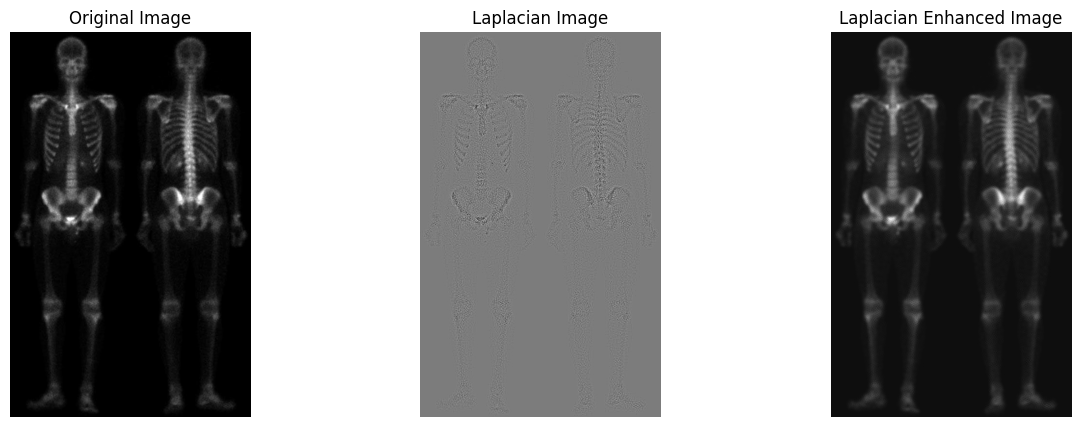

In [51]:
# Expand dimensions to add a batch dimension
img_expanded = tf.expand_dims(img, axis=0)
# Expand dimensions to add a channel dimension
img_expanded = tf.expand_dims(img_expanded, axis=-1)

# Define Laplacian kernel
laplacian_kernel = tf.constant([[0, 1, 0],
                                [1, -4, 1],
                                [0, 1, 0]], dtype=tf.float32)

# Apply Laplacian filter
laplacian_img = tf.nn.conv2d(img_expanded,
                              tf.reshape(laplacian_kernel, (3, 3, 1, 1)),
                              strides=[1, 1, 1, 1],
                              padding='SAME')

# Remove the added dimensions before displaying
laplacian_img = tf.squeeze(laplacian_img)

# Add Laplacian result to original image
laplacian_enhanced_img = img + laplacian_img

# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(img), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian_img, cmap='gray')
plt.title('Laplacian Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(laplacian_enhanced_img, cmap='gray')
plt.title('Laplacian Enhanced Image')
plt.axis('off')

plt.show()


## c) Sharpen the image obtained by adding a) and b) [2 Marks]

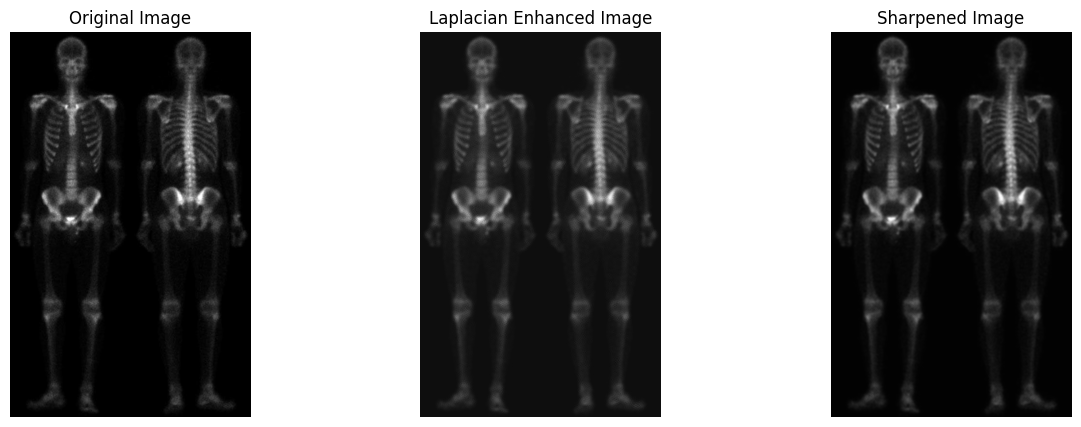

In [52]:
# Add Laplacian result to original image
laplacian_enhanced_img = img + laplacian_img

# Sharpen the image by adding a fraction of the Laplacian enhanced image
sharpened_img = img + 0.5 * laplacian_img  # Adjust the fraction as needed

# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(img), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian_enhanced_img, cmap='gray')
plt.title('Laplacian Enhanced Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened_img, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.show()

## d) Sobel gradient of a) [4 Marks]

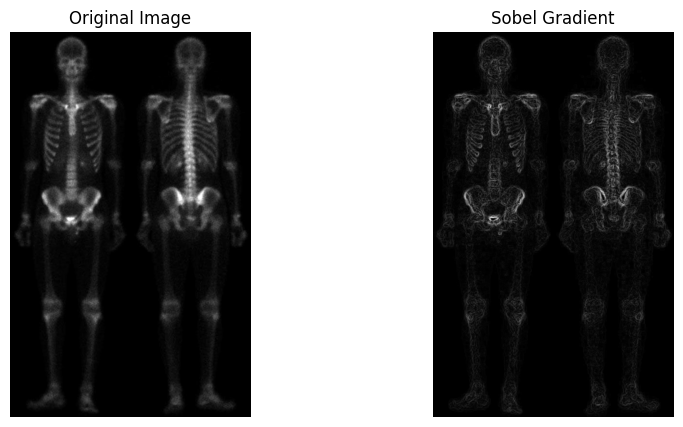

In [53]:
# Expand dimensions to add a batch dimension
img_expanded = tf.expand_dims(img, axis=0)
# Expand dimensions to add a channel dimension
img_expanded = tf.expand_dims(img_expanded, axis=-1)

# Sobel Operator
sobel_x = tf.constant([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]], dtype=tf.float32)
sobel_y = tf.constant([[-1, -2, -1],
                       [0, 0, 0],
                       [1, 2, 1]], dtype=tf.float32)

# Apply Sobel filters
gradient_x = tf.nn.conv2d(img_expanded, tf.reshape(sobel_x, (3, 3, 1, 1)), strides=[1, 1, 1, 1], padding='SAME')
gradient_y = tf.nn.conv2d(img_expanded, tf.reshape(sobel_y, (3, 3, 1, 1)), strides=[1, 1, 1, 1], padding='SAME')

# Compute the magnitude of the gradient
sobel_gradient = tf.sqrt(tf.square(gradient_x) + tf.square(gradient_y))

# Remove the added dimensions before displaying
sobel_gradient = tf.squeeze(sobel_gradient)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(tf.squeeze(img), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_gradient, cmap='gray')
plt.title('Sobel Gradient')
plt.axis('off')

plt.show()

## e) Smooth the d) with a $5\times 5$ averaging filter [4 Marks]

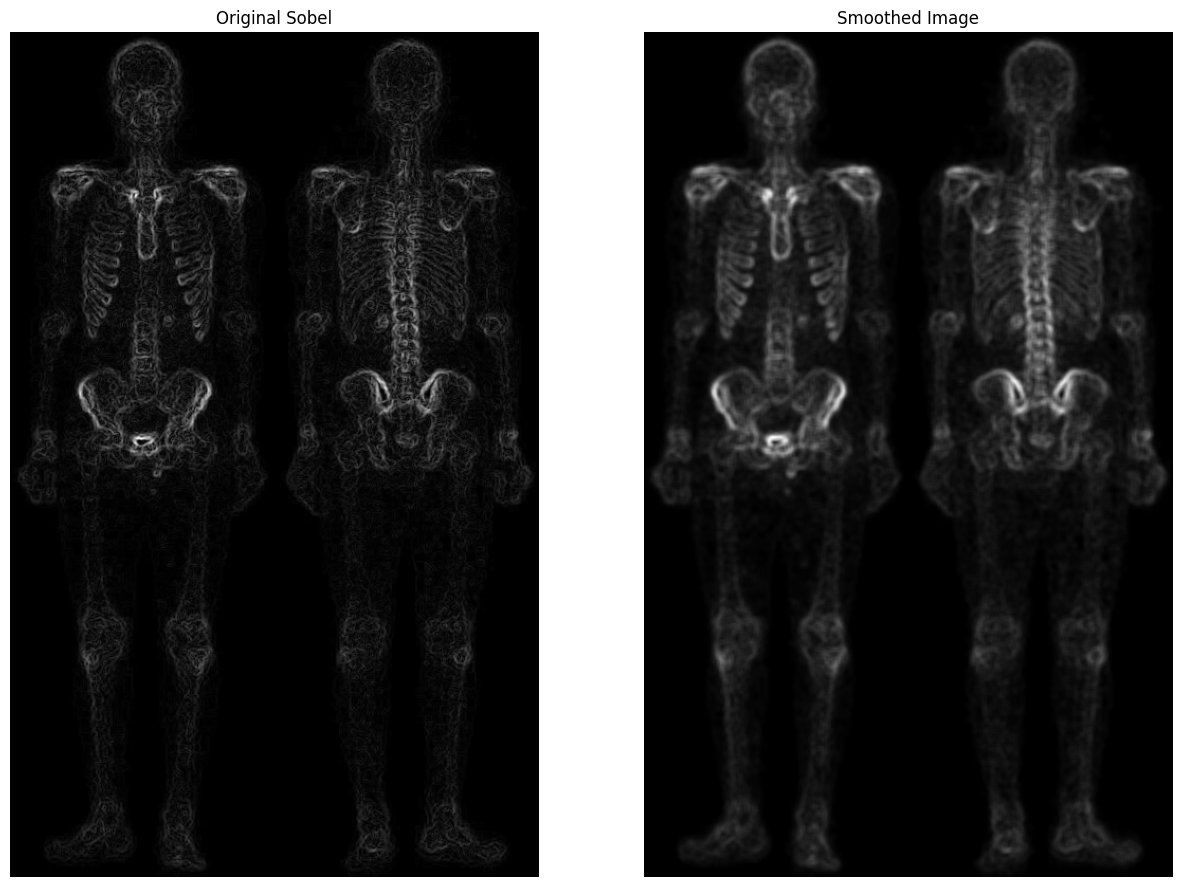

Image min and max are (0.0, 292.638916015625)


In [58]:
from PIL import Image

# Load the image using Pillow
img_path = '/content/skeleton_orig.tif'
img_pil = Image.open(img_path)

# Convert the image to a format compatible with TensorFlow
img_np = np.array(img_pil)  # Convert PIL image to NumPy array
img = tf.convert_to_tensor(img_np, dtype=tf.float32)  # Convert NumPy array to TensorFlow tensor

# Ensure the image has the correct dimensions and channels
img = tf.expand_dims(img, axis=-1)

# Sobel Operator
sobel_x = tf.constant([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]], dtype=tf.float32)
sobel_y = tf.constant([[-1, -2, -1],
                       [0, 0, 0],
                       [1, 2, 1]], dtype=tf.float32)

# Apply Sobel filters
gradient_x = tf.nn.conv2d(tf.expand_dims(img, axis=0), tf.reshape(sobel_x, (3, 3, 1, 1)),
                           strides=[1, 1, 1, 1], padding='SAME')
gradient_y = tf.nn.conv2d(tf.expand_dims(img, axis=0), tf.reshape(sobel_y, (3, 3, 1, 1)),
                           strides=[1, 1, 1, 1], padding='SAME')

# Compute the magnitude of the gradient
sobel_gradient = tf.sqrt(tf.square(gradient_x) + tf.square(gradient_y))

# Define a 5x5 averaging kernel
avg_kernel = tf.ones((5, 5, 1, 1), dtype=tf.float32) / 25.0

# Smooth the Sobel gradient image with the averaging filter
smoothed_sobel_gradient = tf.nn.conv2d(tf.expand_dims(sobel_gradient, axis=0),
                                       avg_kernel,
                                       strides=[1, 1, 1, 1],
                                       padding='SAME')

# Remove the added dimensions before displaying
smoothed_sobel_gradient = tf.squeeze(smoothed_sobel_gradient)

# Display the results
plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.imshow(tf.squeeze(sobel_gradient), cmap='gray')
plt.title('Original Sobel')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tf.squeeze(smoothed_sobel_gradient), cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')

plt.show()

print('Image min and max are ({}, {})'.format(tf.reduce_min(smoothed_sobel_gradient),
                                               tf.reduce_max(smoothed_sobel_gradient)))


## f) Get Mask image formed by pixelwise product of c) and e) [2 Marks]

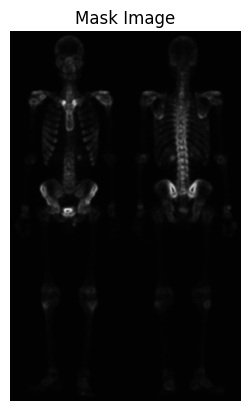

In [65]:
# Add Laplacian result to original image to get Laplacian enhanced image
laplacian_enhanced_img = img + laplacian_img

# Get the mask image formed by the pixel-wise product of Laplacian enhanced image and smoothed Sobel gradient image
mask_image = laplacian_enhanced_img * smoothed_sobel_gradient

# Display the mask image
plt.imshow(tf.squeeze(mask_image), cmap='gray')
plt.title('Mask Image')
plt.axis('off')
plt.show()

## g) Get sharpened image obtained by the sum of a) and f) [2 Marks]

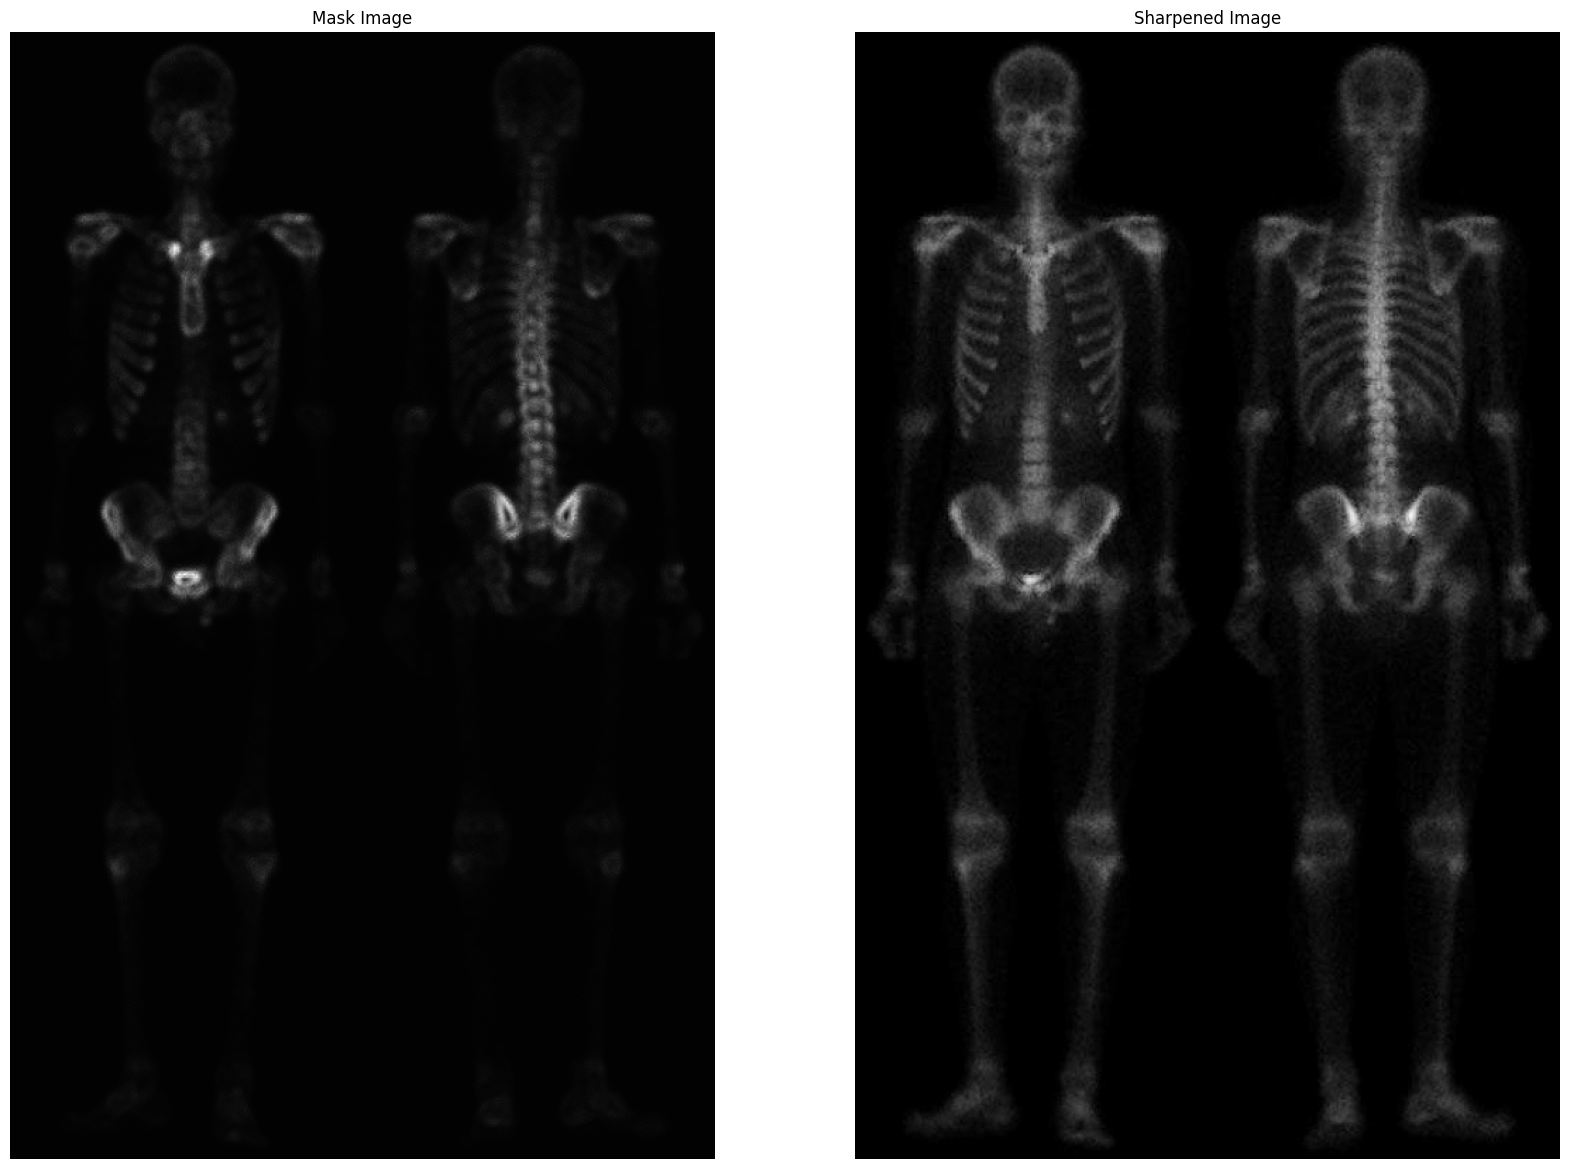

In [68]:
# Get the mask image formed by the pixel-wise product of Laplacian enhanced image and smoothed Sobel gradient image
mask_image = laplacian_enhanced_img * smoothed_sobel_gradient

# Normalize the mask image
mask_image = 255 * (mask_image - tf.reduce_min(mask_image)) / (tf.reduce_max(mask_image) - tf.reduce_min(mask_image))

# Apply the provided logic
img_f = mask_image
img_g = img - 0.5 * img_f

# Display the images
plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(tf.squeeze(img_f), cmap='gray')
plt.title('Mask Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tf.squeeze(img_g), cmap='gray', vmin=0, vmax=255)
plt.title('Sharpened Image')
plt.axis('off')

plt.show()

## h) Final results obtained by applying power law transformation to g) [2 Marks]


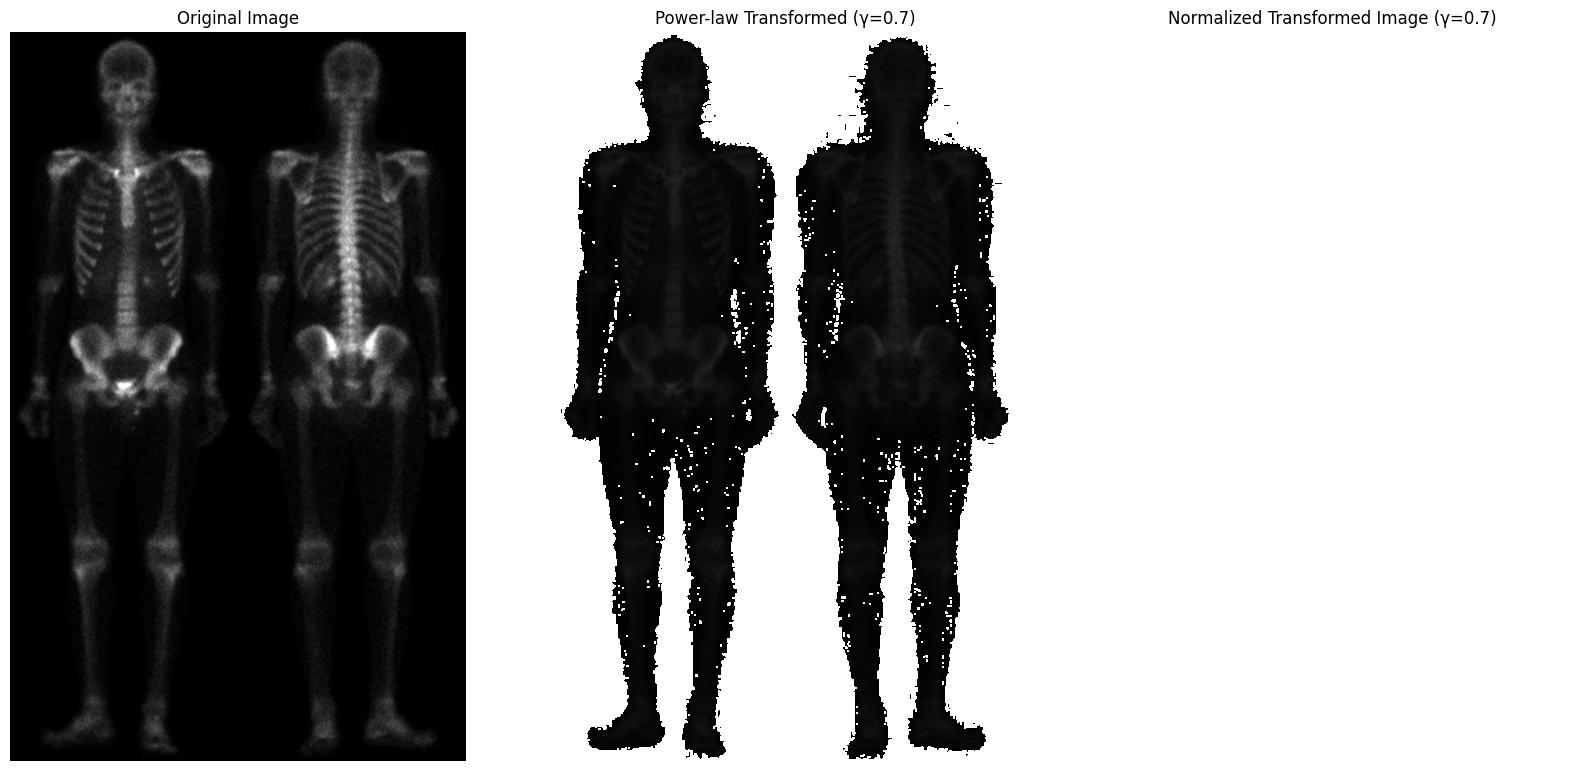

In [71]:
gamma = 0.7
img_h_old = tf.pow(img_g, gamma)

img_h = (img_h_old - tf.reduce_min(img_h_old)) / (tf.reduce_max(img_h_old) - tf.reduce_min(img_h_old))
plt.figure(figsize=(20, 20))

plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(img_a), cmap='gray',  vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(tf.squeeze(img_h_old), cmap='gray',  vmin=0, vmax=255)
plt.title(f'Power-law Transformed (γ={gamma})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(img_h), cmap='gray',  vmin=0, vmax=255)
plt.title(f'Normalized Transformed Image (γ={gamma})')
plt.axis('off')

plt.show()


##i) Write down your observation related to image enhancement from a) to h) [2 Marks]

-The Laplacian filter and Sobel gradient are effective in detecting edges and enhancing image features.

-Smoothing helps to reduce noise and produce a more refined gradient image, improving edge detection.

-The combination of Laplacian and Sobel filters along with the power law transformation results in significant enhancement of image details and contrast.

-The final sharpened and transformed image exhibits improved clarity and emphasizes important features, making it visually appealing and suitable for further analysis or presentation